# Exploratory Data Analysis: House closing price prediction.

In this notebook I will perform an exploratory analysis to better understand the data shared, which consists of a data set of home listings and home sales. The idea is to understand what feature I have and what is their relationship with the target, ClosePrice, focusing on the features mentioned for this exercise:


*   BathsTotal
*   BedsTotal
*   CDOM (Cumulative Days on Market)
*   LotSizeAreaSQFT
*   SqFtTotal
*   ElementarySchoolName

The way of telling this analysis will be following a narrative tht I will be putting together with the data that I will find, and that I will be putting into graphs to make it easier to understand.








In [27]:
# I import the packages needed for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [28]:
df = pd.read_csv('home-listings-example.csv')
print(df.shape)
df.head()

(653, 250)


,NumberOfTanksAndPonds,ListingFinancing,AccessoryUnitType,AccessoryUnitYN,AcresBottomLand,AcresCultivated,AcresIrrigated,AcresPasture,AGExemptionYN,AppFeePayableTo,AppFeePlus18YrsYN,ApplicationFeeAmount,AppointmentCall,AppointmentPhone,AppraiserName,Barn1Length,Barn1Width,Barn2Length,Barn2Width,Barn3Length,Barn3Width,BathsFull,BathsHalf,BathsTotal,BedroomBathroomFeatures,BedsTotal,Block,BuildingNumber,BuyersAgencyCommission,CancelledDate,CapitalizationRate,CDOM,City,CloseDate,ClosePrice,CommunityFeatures,CompensationPaid,ComplexName,ConditionalDate,ConsentforVisitorstoRecord,ConstructionMaterials,YearBuiltDetails,Country,CountyOrParish,CropRetireProgramYN,Crops,CurrentPrice,DateAvailable,DepositAmount,DepositPet,Development,DOCBOX_GUID,DOM,Easements,ElementarySchoolName,Equity,Exclusions,ExpirationDate,ExpirationDateOption,ExteriorFeatures,FencedYardYN,FHA_VA_ApprovedComplexNumber,FinancingApproved,FireplaceFeatures,FireplacesTotal,FloorLocationNumber,Flooring,FoundationDetails,FurnishedYN,GarageLength,GarageWidth,GreenBuildingCertification,GrossAnnualIncome,HandicapYN,HasDocBoxYN,Heating,HighSchoolName,AssociationType,AssociationFeeFrequency,AssociationFee,AssociationFeeIncludes,HOAManagementCompany,HOAManagementCompanyPhone,StructuralStyle,IDXOptInYN,IncludeSlideshowYN,InsuranceExpense,IntermediateSchoolName,IntraOfficeRemarks,JuniorHighSchoolName,KeyboxNumber,KeyBoxType,OtherEquipment,LakeName,LandLeasedYN,LaundryLocation,LeaseConditions,LeasePrice,LeaseTerms,LeaseType,LeasedDate,LenderName,CoListAgentFullName,CoListAgentMLSID,ListAgentDirectWorkPhone,ListAgentFullName,ListAgentMLSID,ListOfficeMLSID,ListOfficeName,ListOfficePhone,ListPrice,ListPriceLow,ListingAgreement,ListingContractDate,Loan1Amount,Loan1InterestRate,Loan1Years,Loan2Amount,Loan2InterestRate,Loan2Years,LoanBalance,LoanInterestRate,LoanPaymentType,LoanType,LotFeatures,LotSizeArea,LotSizeDimensions,LotSizeSource,LotSizeAreaSQFT,LotSizeUnits,LotSize,MiddleSchoolName,MLSAreaMajor,MLSNumber,MLSNumberSaleOrLease,MLSAreaMinor,MortgageCompany,MunicipalUtilityDistrictYN,NoticeSurveillanceDevicesPresent,NumberOfBarns,NumberOfDiningAreas,NumberOfLakes,NumberOfLivingAreas,NumberOfLots,NumberOfParkingSpaces,NumberOfPetsAllowed,NumberOfResidences,NumberOfStories,NumberOfStoriesInBuilding,NumberOfUnits,NumberOfVehicles,NumberOfWells,Occupancy,OffMarketDate,OfficeSupervisor,OfficeSupervisorLicense,OfficeSupervisorPhone,OpenHouseUpcoming,OriginalListPrice,OwnerName,OwnerPermissionToVideoYN,ParcelNumber,ParcelNumber2,ParkingFeatures,ParkingSpacesCarport,ParkingSpacesCoveredTotal,ParkingSpacesGarage,PendingDate,PetPolicy,PetsYN,PhotoCount,PlannedDevelopment,PoolYN,PoolFeatures,Possession,PossibleShortSaleYN,PostalCodePlus4,TitleCompanyPreferred,PresentUse,Unnamed: 179,PrimarySchoolName,PrivateRemarks,PublicRemarks,PropertySubType,PropertyType,FinancingProposed,ProposedUse,Directions,RanchName,RanchType,RATIO_ClosePrice_By_ListPrice,RATIO_ClosePrice_By_OriginalListPrice,RATIO_CurrentPrice_By_Acres,RATIO_CurrentPrice_By_LotSizeAreaSQFT,RATIO_CurrentPrice_By_SQFT,RATIO_CurrentPrice_By_SQFTBuilding,Restrictions,RoadFrontage,Roof,SchoolDistrict,SecondMortgageYN,SecurityFeatures,SecuritySystemYN,SellerContributions,SellerType,SellingAgent2,SellingAgentDirectWorkPhone,SellingAgentFullName,SellingAgentMLSID,SellingAgentSupervisor,SellingOfficeMLSID,SellingOfficeName,SellingOfficePhone,SeniorHighSchoolName,ShowingInstructions,ShowingInstructionsType,SmartHomeFeaturesApporPassYN,SoilType,SoldTerms,SpecialNotes,SQFTBuilding,SQFTGross,SqFtTotal,BuildingAreaSource,StateOrProvince,Status,StatusChangeTimestamp,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,SubAgencyCommission,SubdividedYN,SubdivisionName,TaxLegalDescription,TempOffMarketDate,ThirdPartyAssistanceProgramYN,TitleCompanyClosing,TitleCompanyLocation,TitleCompanyPhone,Topography,TransactionType,UnexemptTaxes,UnitNumber,Utilities,UtilitiesOther,VariableFeeYN,WasherDryerConnections
0,NaN,NaN

In [29]:
# First, I want to understand the time range in which the houses present in the
# dataset were listed, which is from 2014-09-19 to 2020-02-24. Although the
# ListingContractDate feature was not included in the reference variables to be
# taken into account, I find it very useful to have a temporal notion of the
# analysis.

print(df['ListingContractDate'].min())
print(df['ListingContractDate'].max())

2014-09-19
2020-02-24


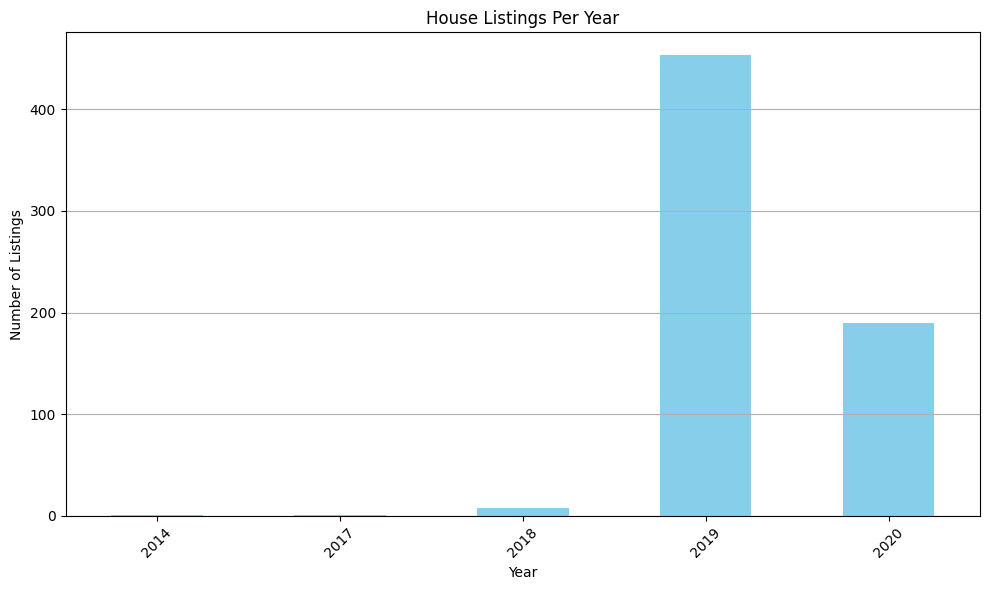

In [33]:
# What I see is that is a fairly wide time range that is concentrated mainly in
# 2019, where almost all the listings were made, with 2020 being the year with
# the second highest number of houses listed.

df['ListingContractDate'] = pd.to_datetime(df['ListingContractDate'])
df['ListingYear'] = df['ListingContractDate'].dt.year
house_counts = df.groupby('ListingYear').size()

plt.figure(figsize=(10, 6))
house_counts.plot(kind='bar', color='skyblue')
plt.title('House Listings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# I see that the houses listed correspond almost all to the city of Frisco,
# located in the state of Texas. It is interesting to know that all the analysis
# is concentrated in a single city. In a quick internet research I found that
# Frisco is among the fastest growing cities in the US in the recent years.
# On the other hand, it has public schools ranked among the best in the country
# and in 2018 it had the highest graduation rate of all communities, which makes
# the ElementarySchoolName feature even more important.

df['City'].value_counts()

City
Frisco    650
Allen       3
Name: count, dtype: int64

In [16]:
# I was interested in knowing the condition of the houses that were listed, as
# that is usually a strong predictor of their price. And I see that the vast
# majority are not new constructions.

df['YearBuiltDetails'].value_counts()

YearBuiltDetails
Preowned                         464
New Construction - Incomplete     93
New Construction - Complete       93
Unknown                            2
Proposed                           1
Name: count, dtype: int64

In [76]:
# I will now concentrate on the specified columns.
# TODO: Analyze more columns of the complete dataset to find more interesting
# information.

df_reduced = df[['BathsTotal','BedsTotal','CDOM','LotSizeAreaSQFT','SqFtTotal','ElementarySchoolName','ListingContractDate',
                 'RATIO_CurrentPrice_By_SQFT','ClosePrice']]
print(df_reduced.shape)
df_reduced.head()

(653, 9)


,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ListingContractDate,RATIO_CurrentPrice_By_SQFT,ClosePrice
0,2.1,3,111,4573.80,2460,Vaughn,2019-11-05,176.71,NaN
1,4.1,4,2,5837.04,3418,Vaughn,2020-02-22,151.19,NaN
2,5.2,5,70,34848.00,8093,Hicks,2019-12-16,407.14,NaN
3,1.0,2,13,4356.00,1122,Rogers,2020-02-11,159.98,NaN
4,1.1,1,10,1306.80,884,Bright,2020-02-14,214.37,NaN


In [52]:
# I look at how many houses have an empty target, i.e. no ClosePrice. These are
# homes that were listed but dit not sell

df_reduced['ClosePrice'].isnull().sum()

430

In [77]:
# Since the modeling exercise consists of predicting the ClosePrice of the
# houses, and since only the houses that were sold have ClosePrice, I will
# create a data frame only with these houses. That is the df that I will use to
# train the model, and to understand the characteristics of the houses that did
# sell.

sold_houses = df_reduced[df_reduced['ClosePrice'] > 0]
print(sold_houses.shape)
sold_houses.head()

(223, 9)


,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ListingContractDate,RATIO_CurrentPrice_By_SQFT,ClosePrice
430,3.0,4,52,7100.28,2484,Allen,2019-11-21,195.25,485000.0
431,2.1,4,58,8712.00,2631,Fisher,2019-09-25,125.43,330000.0
432,1.1,1,38,1306.80,884,Bright,2019-12-02,209.28,185000.0
433,2.0,3,11,6969.60,1451,Shawnee,2019-11-08,144.73,210000.0
434,2.0,3,89,6098.40,1559,Bright,2019-08-07,144.32,225000.0


In [50]:
# On the other hand, I would also like to analyze the houses that were listed
# but did not sell, as this may provide more information about those that did
# sell and are the subject of this analysis.

no_sold_houses = df[df['ClosePrice'].isnull()]
print(no_sold_houses.shape)

(430, 251)


# Sold Houses Analysis

In [57]:
# Of the houses sold, I begin to analyze the features to see if there is
# anything that does not make sense. Among that, I find that there are houses
# that have negative days on the market. As I can't make sense of this, and
# there are only a few observations, I take them out of my dataset.

negative_cdom = sold_houses[sold_houses['CDOM'] < 0]
print(negative_cdom.shape)
negative_cdom.head()

(3, 10)


,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ListingContractDate,ClosePrice,ListingYear,MonthsOnTheMarket
523,2.0,3,-6,6185.52,2229,Fisher,2019-10-02,345000.0,2019,-0.0
540,2.1,4,-62,0.00,2467,Bright,2019-05-06,367990.0,2019,-2.0
576,3.0,4,-13,6621.12,2760,Newman,2019-11-13,420250.0,2019,-0.0


In [58]:
# I also find houses that do not have SQFT

no_LotSizeAreaSQFT = sold_houses[sold_houses['LotSizeAreaSQFT'] == 0]
print(no_LotSizeAreaSQFT.shape)
no_LotSizeAreaSQFT.head()

(10, 10)


,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ListingContractDate,ClosePrice,ListingYear,MonthsOnTheMarket
520,2.0,3,6,0.0,1694,Bright,2019-09-24,340000.0,2019,0.0
522,2.0,3,60,0.0,1694,Bright,2019-09-24,342990.0,2019,2.0
524,2.0,3,102,0.0,1694,Bright,2019-09-13,346000.0,2019,3.0
540,2.1,4,-62,0.0,2467,Bright,2019-05-06,367990.0,2019,-2.0
557,3.0,3,4,0.0,2646,Jim Spradley,2019-11-08,392000.0,2019,0.0


In [78]:
# I take out the ones that have negative days on the market

sold_houses = sold_houses[sold_houses['CDOM'] >= 0]

# I take out the ones that do not have SQFT

sold_houses = sold_houses[sold_houses['LotSizeAreaSQFT'] > 0]

sold_houses.shape

(211, 9)

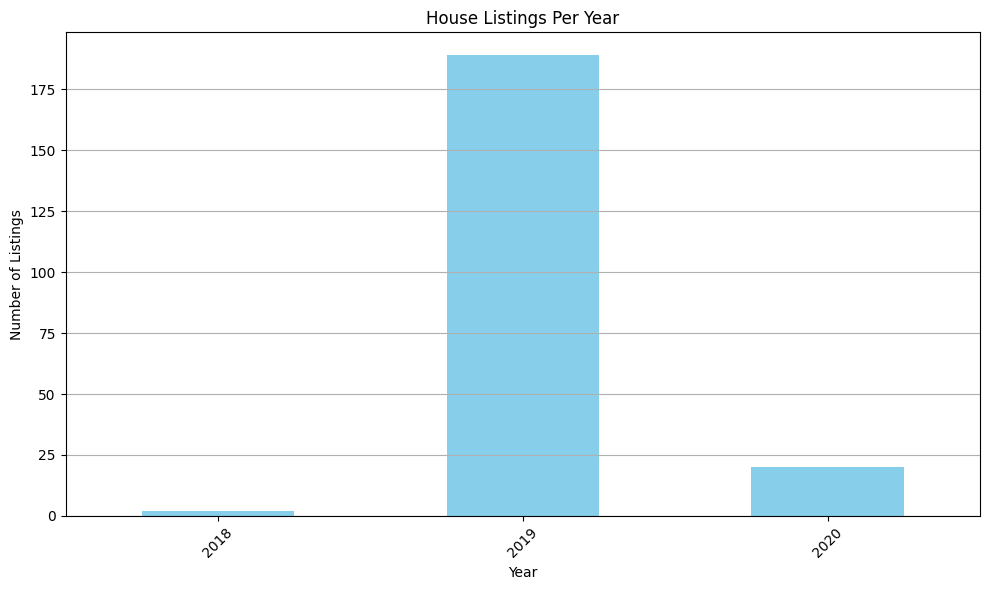

In [79]:
# Now I want to see the houses sold over the years. The first thing I see is
# that most sold in 2019, which makes sense since the most homes were listed in
# this year. This would seem to indicate that homes tend to sell in the first
# year in this city.

sold_houses['ListingContractDate'] = pd.to_datetime(sold_houses['ListingContractDate'])
sold_houses['ListingYear'] = sold_houses['ListingContractDate'].dt.year
house_counts = sold_houses.groupby('ListingYear').size()

plt.figure(figsize=(10, 6))
house_counts.plot(kind='bar', color='skyblue')
plt.title('House Listings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

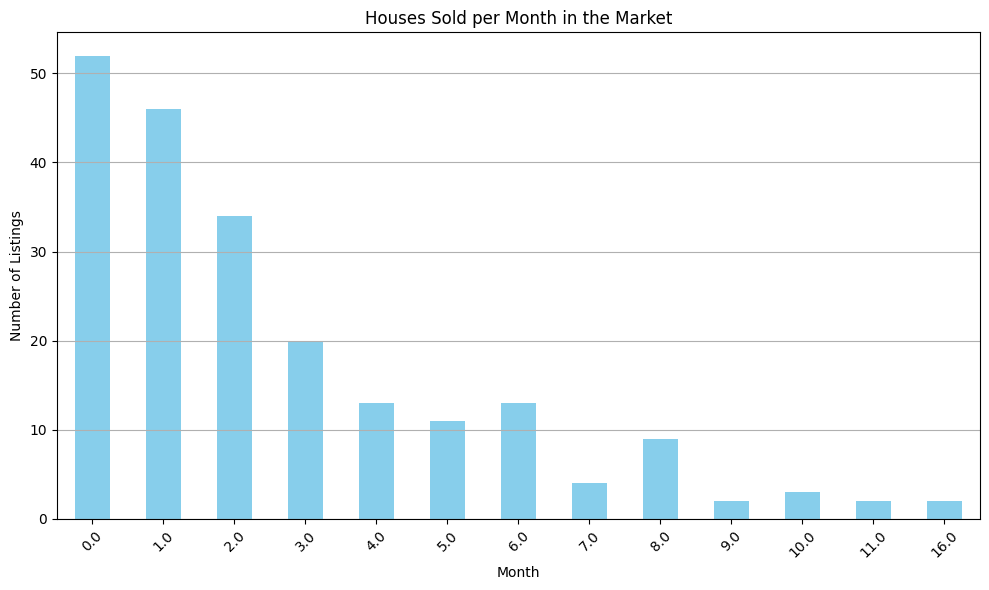

In [61]:
# Therefore, I now want to see how many days on the market the houses spend
# until they are sold, expressing the days in months. And what we see is that
# most homes are sold in the first 3 months after they are listed. This would
# indicate that there is a high demand in Frisco, and that homes that represent
# a good buying opportunity tend to be purchased fairly quickly.

sold_houses['MonthsOnTheMarket'] = round(sold_houses['CDOM']/30,0)
house_counts = sold_houses.groupby('MonthsOnTheMarket').size()

plt.figure(figsize=(10, 6))
house_counts.plot(kind='bar', color='skyblue')
plt.title('Houses Sold per Month in the Market')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Now, in order to understand a little better the characteristics of the homes
# that sold, I want to look at some quick metrics of the features.

#BathsTotal
print("BathsTotal")
print("min baths:" ,sold_houses['BathsTotal'].min())
print("mean baths:", sold_houses['BathsTotal'].mean())
print("max baths:", sold_houses['BathsTotal'].max())
print("- - - - - - -")

#BedsTotal
print("BedsTotal")
print("min beds:" ,sold_houses['BedsTotal'].min())
print("mean beds:", sold_houses['BedsTotal'].mean())
print("max beds:", sold_houses['BedsTotal'].max())
print("- - - - - - -")

#CDOM
print("CDOM")
print("min CDOM:" ,sold_houses['CDOM'].min())
print("mean CDOM:", sold_houses['CDOM'].mean())
print("max CDOM:", sold_houses['CDOM'].max())
print("- - - - - - -")

#LotSizeAreaSQFT
print("LotSizeAreaSQFT")
print("min LotSizeAreaSQFT:" ,sold_houses['LotSizeAreaSQFT'].min())
print("mean LotSizeAreaSQFT:", sold_houses['LotSizeAreaSQFT'].mean())
print("max LotSizeAreaSQFT:", sold_houses['LotSizeAreaSQFT'].max())
print("- - - - - - -")

#SqFtTotal
print("SqFtTotal")
print("min SqFtTotal:" ,sold_houses['SqFtTotal'].min())
print("mean SqFtTotal:", sold_houses['SqFtTotal'].mean())
print("max SqFtTotal:", sold_houses['SqFtTotal'].max())
print("- - - - - - -")

#ElementarySchoolName
print("ElementarySchoolName")
print("Total Schools:" ,sold_houses['ElementarySchoolName'].nunique())
print("Most common:", sold_houses['ElementarySchoolName'].value_counts())
print("- - - - - - -")

#ClosePrice
print("ClosePrice")
print("min ClosePrice:" ,sold_houses['ClosePrice'].min())
print("mean ClosePrice:", sold_houses['ClosePrice'].mean())
print("max ClosePrice:", sold_houses['ClosePrice'].max())

BathsTotal
min baths: 1.1
mean baths: 2.861611374407583
max baths: 5.2
- - - - - - -
BedsTotal
min beds: 1
mean beds: 3.829383886255924
max beds: 5
- - - - - - -
CDOM
min CDOM: 0
mean CDOM: 80.36018957345972
max CDOM: 488
- - - - - - -
LotSizeAreaSQFT
min LotSizeAreaSQFT: 1306.8
mean LotSizeAreaSQFT: 8157.280947867298
max LotSizeAreaSQFT: 40423.68
- - - - - - -
SqFtTotal
min SqFtTotal: 884
mean SqFtTotal: 2934.9763033175354
max SqFtTotal: 7891
- - - - - - -
ElementarySchoolName
Total Schools: 22
Most common: ElementarySchoolName
Rogers                   31
Vaughn                   25
Bright                   20
Tadlock                  18
Gunstream                15
Pink                     14
Christie                 14
Carroll                  12
Spears                   10
Newman                   10
Sem                       9
Jim Spradley              7
Shawnee                   7
Purefoy                   6
Fisher                    5
Sparks                    2
Judy Rucker      

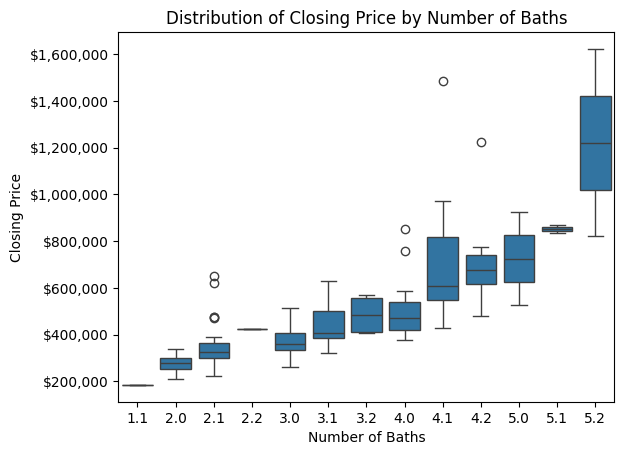

In [15]:
# Distribution of ClosePrice by number of baths, where we see that the higher
# the number of baths, the higher the ClosePrice. We also see that the higher
# the number of baths, the greater the price variability. And there are also a
# few outliers of houses with not so many baths that are sold at a comparatively
# higher price.

sns.boxplot(x='BathsTotal', y='ClosePrice', data=sold_houses)
plt.xlabel('Number of Baths')
plt.ylabel('Closing Price')
plt.title('Distribution of Closing Price by Number of Baths')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

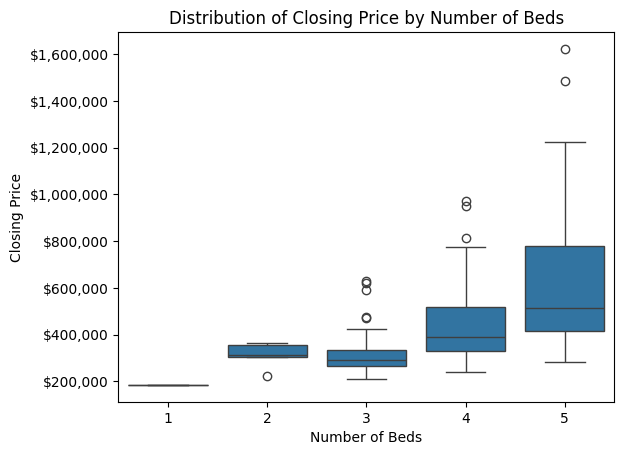

In [16]:
# I do the same analysis for the number of beds and find the same relationship

sns.boxplot(x='BedsTotal', y='ClosePrice', data=sold_houses)
plt.xlabel('Number of Beds')
plt.ylabel('Closing Price')
plt.title('Distribution of Closing Price by Number of Beds')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

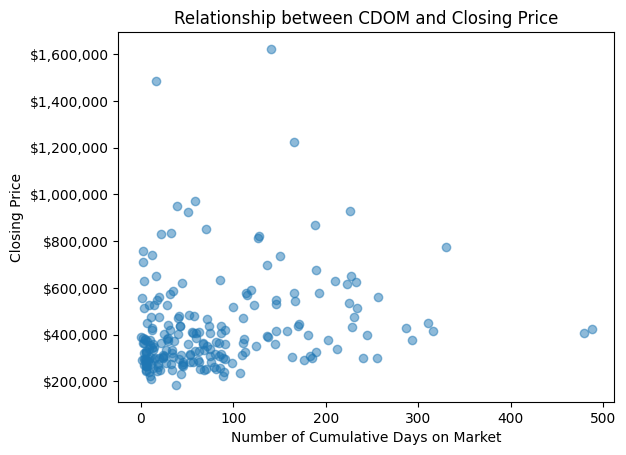

In [17]:
# We see that the largest number of homes sols had less than 100 days on the
# market, and that the ones that sold the fastest had a relatively lower price.
# Which I believe reinforces my theory of high demand in the Frisco real estate
# market

plt.scatter(sold_houses['CDOM'], sold_houses['ClosePrice'], alpha=0.5)
plt.xlabel('Number of Cumulative Days on Market')
plt.ylabel('Closing Price')
plt.title('Relationship between CDOM and Closing Price')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

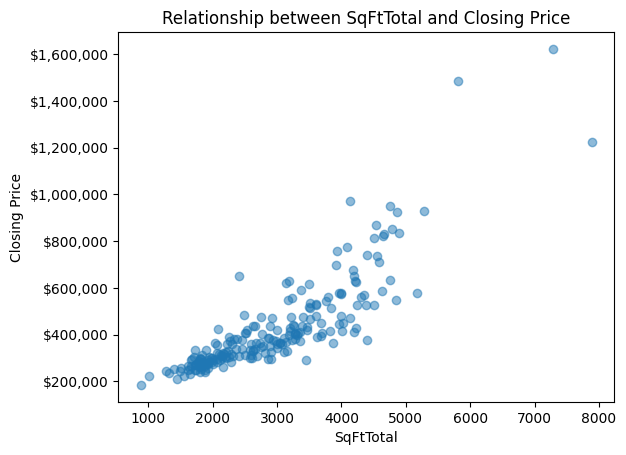

In [20]:
# Of course, we see that the higher the SQFT, the higher the ClosePrice. And we
# also see that most of the homes sold had comparatively less square footage.

plt.scatter(sold_houses['SqFtTotal'], sold_houses['ClosePrice'], alpha=0.5)
plt.xlabel('SqFtTotal')
plt.ylabel('Closing Price')
plt.title('Relationship between SqFtTotal and Closing Price')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

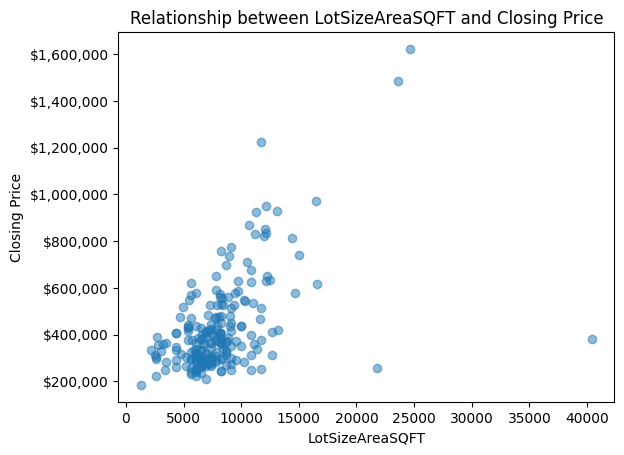

In [21]:
# We see something similar for LotSizeAreaSQFT

plt.scatter(sold_houses['LotSizeAreaSQFT'], sold_houses['ClosePrice'], alpha=0.5)
plt.xlabel('LotSizeAreaSQFT')
plt.ylabel('Closing Price')
plt.title('Relationship between LotSizeAreaSQFT and Closing Price')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

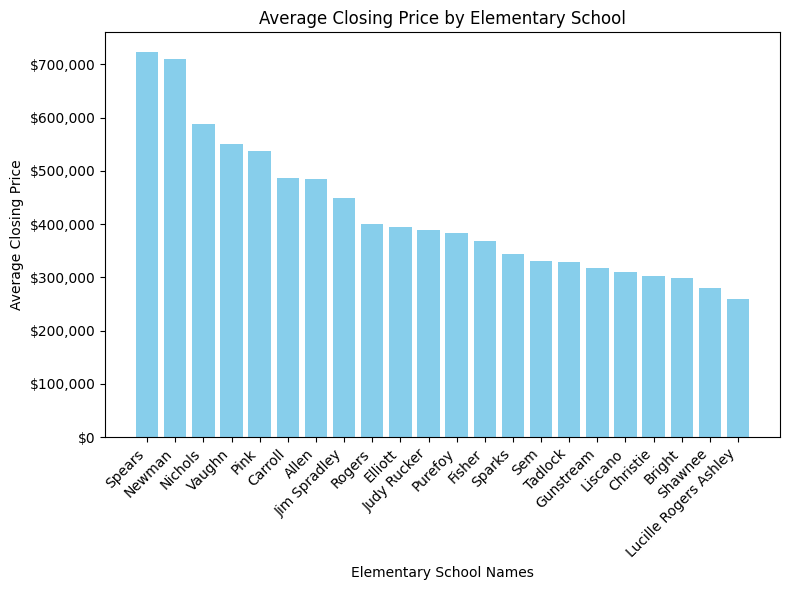

In [24]:
# Now I want to see the relationship between elementary schools and house
# prices, so I group the houses by schools and calculate the average closing
# price. We see that the houses near the schools Spears and Newman had a higher
# average closing price than the rest.

average_prices = sold_houses.groupby('ElementarySchoolName')['ClosePrice'].mean().reset_index()
average_prices_sorted = average_prices.sort_values(by='ClosePrice', ascending = False)

plt.figure(figsize=(8, 6))
plt.bar(average_prices_sorted['ElementarySchoolName'], average_prices_sorted['ClosePrice'], color='skyblue')
plt.xlabel('Elementary School Names')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price by Elementary School')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-49-cf9e46d0ee70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_houses['EncodedElementarySchoolName'] = 'Others'


<Axes: >

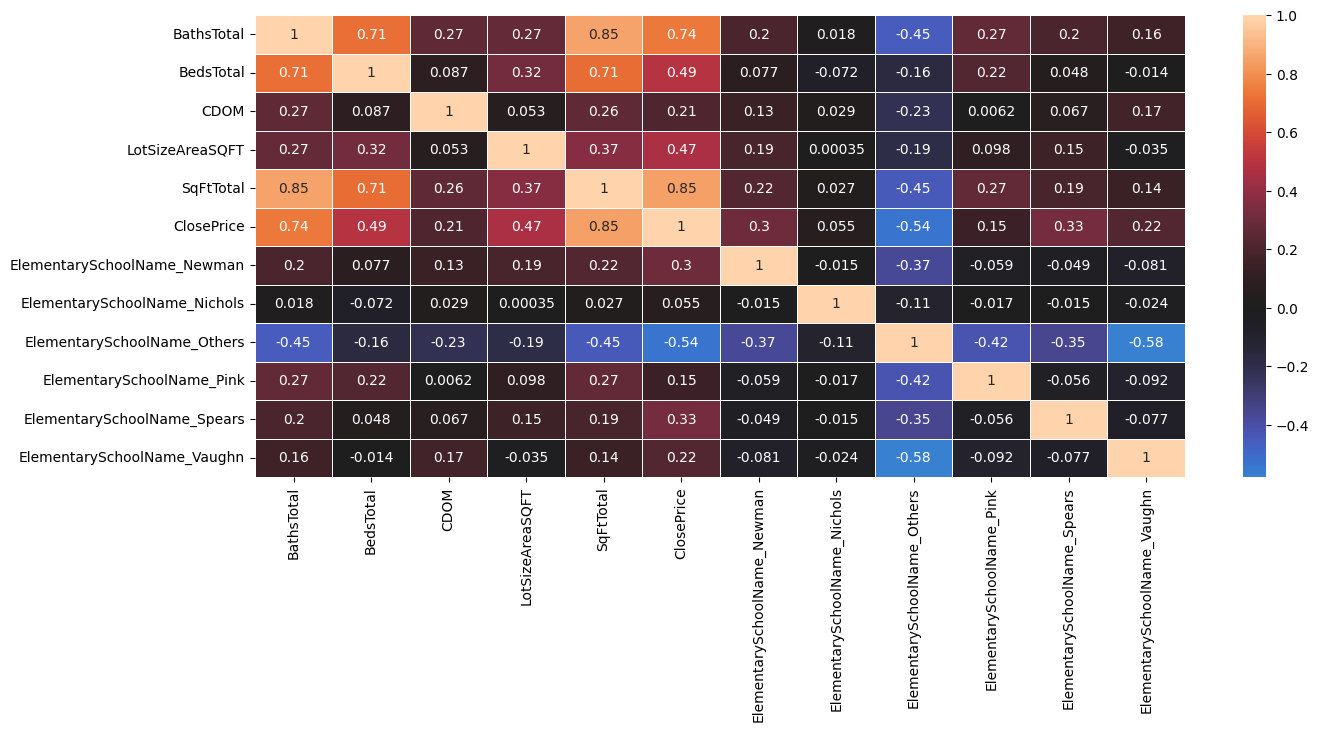

In [49]:
# I am going to see the correlation of the variables with the target, something
# that will be very useful to have a notion of the features that will be more
# predictive for the model.

# To facilitate the reading of the heat map I will keep the 5 schools with the
# highest average closing price and group the rest under "Others".

# What I see is that the features that correlate the most with the target are
# BathsTotal and SqFtTotal, and I also see that the "Others" schools correlate
# negatively with the target.

keep_school_names = ['Spears','Newman','Nichols','Vaughn','Pink']

sold_houses['EncodedElementarySchoolName'] = 'Others'
sold_houses.loc[sold_houses['ElementarySchoolName'].isin(keep_school_names),'EncodedElementarySchoolName'] = sold_houses['ElementarySchoolName']

dummy_school = pd.get_dummies(sold_houses['EncodedElementarySchoolName'], prefix = 'ElementarySchoolName')
sold_houses = pd.concat([sold_houses, dummy_school], axis = 1)
sold_houses.drop(columns=['ElementarySchoolName','EncodedElementarySchoolName'], inplace=True)
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(data=sold_houses.corr(), linewidths=0.5, center=0, annot=True, ax=ax)

In [18]:
# I want to see some data on the price at which the houses were listed.

# TODO: The houses were listed years apart, so the prices are not strictly
# comparable with each other. Perhaps it would make sense to include some
# inflationary variable and adjust the price. On the same note, it would also
# be good for the analysis to include macroeconomic variables that surely
# influence the closing price and that we are not taking into account in the
# present analysis.

print(df['CurrentPrice'].min())
print(df['CurrentPrice'].mean())
print(df['CurrentPrice'].max())

2500
519253.08269525267
3295000


In [21]:
# I check the StructuralStyle feature but it has almost no variability

df['StructuralStyle'].value_counts()

StructuralStyle
Single Detached                                            573
Condo/Townhome                                              63
Garden/Zero Lot Line, Single Detached                        6
Attached or 1/2 Duplex                                       4
Attached or 1/2 Duplex, Condo/Townhome, Single Detached      1
Singlewide Mobile w/Land                                     1
Doublewide Mobile w/Land                                     1
Single Detached, Vacation Home                               1
Farm/Ranch House                                             1
Attached or 1/2 Duplex, Single Detached                      1
Historical/Conservation Dist., Single Detached               1
Name: count, dtype: int64

In [23]:
# TODO: Analyze whether the agent in charge of the transaction influences the
# closing price of the house.

df['ListAgentFullName'].value_counts()

ListAgentFullName
Ben Caballero        31
Robert Brown         23
Carole Campbell      18
Christie Cannon      15
Cassian Bernard      14
                     ..
Katherine Niesman     1
Babe Watts            1
Shailesh Shah         1
John Lee              1
Kevin Sayre           1
Name: count, Length: 378, dtype: int64

## No Sold Houses

<ipython-input-63-64922b1ae55e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_sold_houses['MonthsOnTheMarket'] = round(no_sold_houses['CDOM']/30,0)


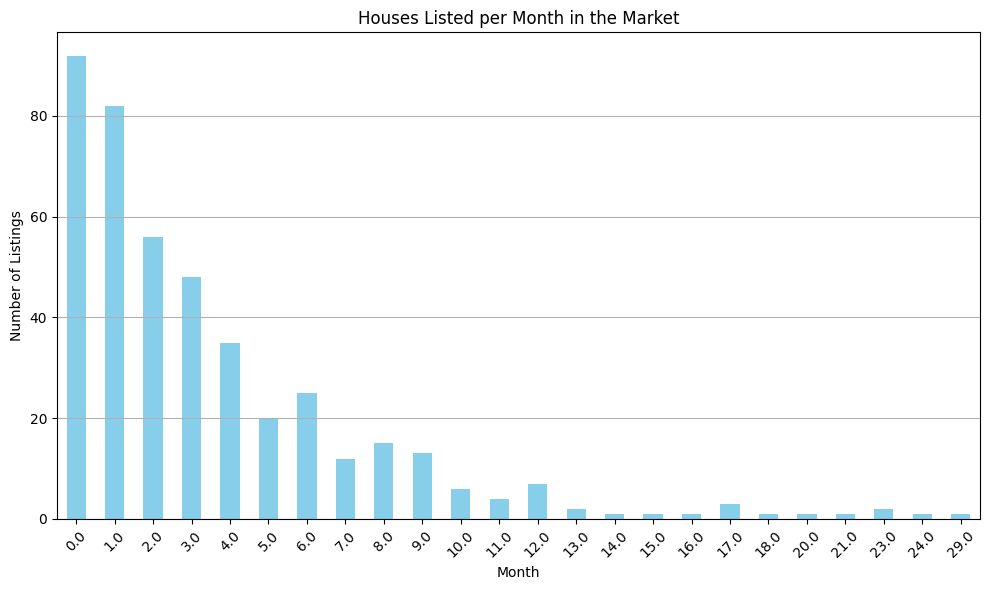

In [63]:
# Now I am going to analyze a little bit the houses that did not sell, starting
# with the number of days on the market expressed in months. The first thing I
# see is that the vast majority were listed shortly before the end of the
# dataset time range, so they could have been sold within the first 3 months.
# On the other hand, I also see that there are houses that have been listed for
# more than two years and have failed to sell. It would be interesting to find
# out the reason.

no_sold_houses['MonthsOnTheMarket'] = round(no_sold_houses['CDOM']/30,0)
house_counts = no_sold_houses.groupby('MonthsOnTheMarket').size()

plt.figure(figsize=(10, 6))
house_counts.plot(kind='bar', color='skyblue')
plt.title('Houses Listed per Month in the Market')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

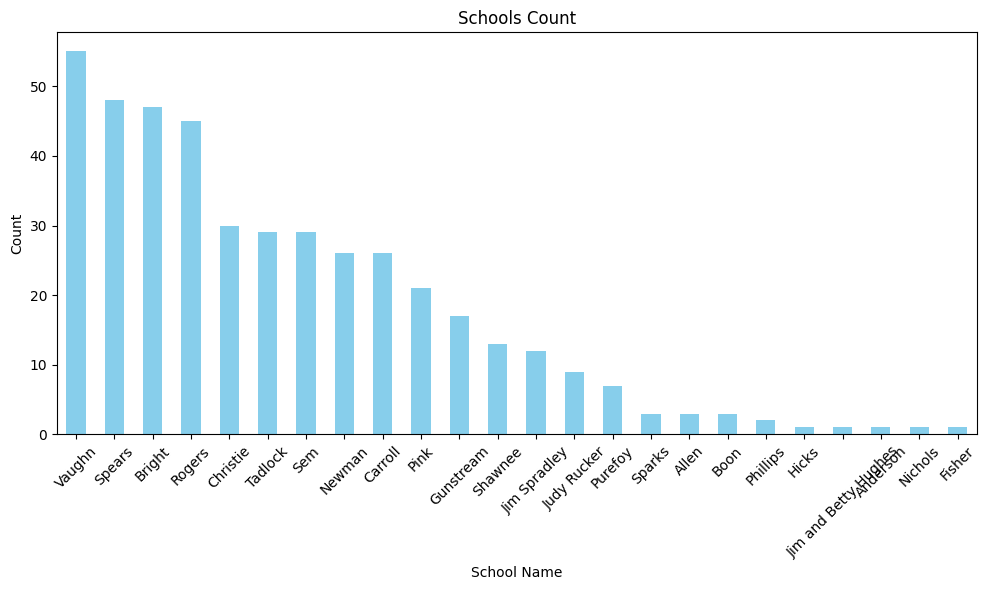

In [66]:
# I see that a good number of the unsold houses are also located near the top
# rated schools in terms of ClosePrice, so probably if we owed a little more
# time to the dataset we would have seen them sell.

no_sold_schools = no_sold_houses['ElementarySchoolName'].value_counts()
no_sold_schools_sorted = no_sold_schools.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
no_sold_schools_sorted.plot(kind='bar', color='skyblue')
plt.title('Schools Count')
plt.xlabel('School Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

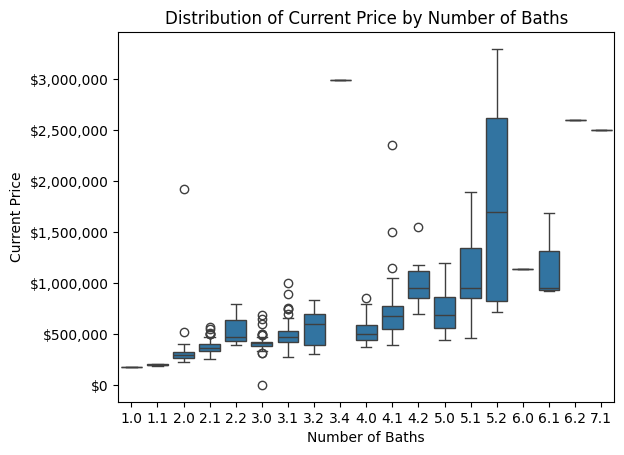

In [68]:
# It is interesting to see that there is greater variability in the number of
# bathrooms in the unsold homes. We also see that there are houses with a higher
# number of baths, which would indicate that many houses could not be sold
# because there were just too expensive.

sns.boxplot(x='BathsTotal', y='CurrentPrice', data=no_sold_houses)
plt.xlabel('Number of Baths')
plt.ylabel('Current Price')
plt.title('Distribution of Current Price by Number of Baths')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

In [73]:
# We see that the average price of a bathroom in an unsold house is 17% higher
# than the average price of a bathroom in a sold house

ratio_bath_close_price = sold_houses['ClosePrice'] / sold_houses['BathsTotal']
ratio_bath_current_price = no_sold_houses['CurrentPrice'] / no_sold_houses['BathsTotal']

print(f"Price per Bath in Sold houses: ${round(ratio_bath_close_price.mean(),2)} VS Price per Bath in No Sold houses: ${round(ratio_bath_current_price.mean(),2)}")

Price per Bath in Sold houses: $148329.15 VS Price per Bath in No Sold houses: $174503.44


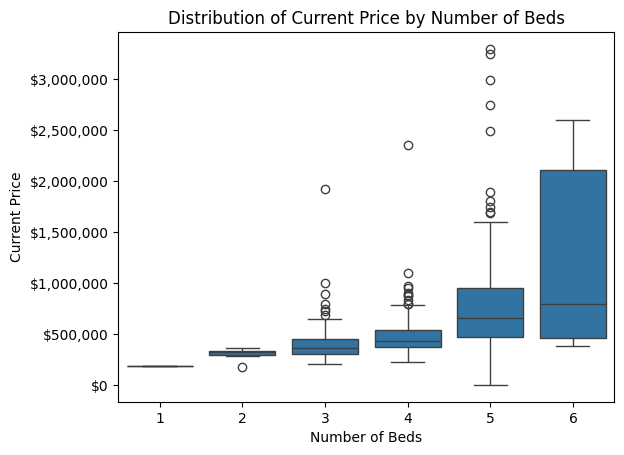

In [69]:

sns.boxplot(x='BedsTotal', y='CurrentPrice', data=no_sold_houses)
plt.xlabel('Number of Beds')
plt.ylabel('Current Price')
plt.title('Distribution of Current Price by Number of Beds')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

In [74]:
# We see that the average price of a bedroom in an unsold house is 27% higher
# than the average price of a bedroom in a sold house

atio_bed_close_price = sold_houses['ClosePrice'] / sold_houses['BedsTotal']
ratio_bed_current_price = no_sold_houses['CurrentPrice'] / no_sold_houses['BedsTotal']

print(f"Price per Bed in Sold houses: ${round(ratio_bed_close_price.mean(),2)} VS Price per Bed in No Sold houses: ${round(ratio_bed_current_price.mean(),2)}")

Price per Bed in Sold houses: $111404.65 VS Price per Bed in No Sold houses: $141551.92


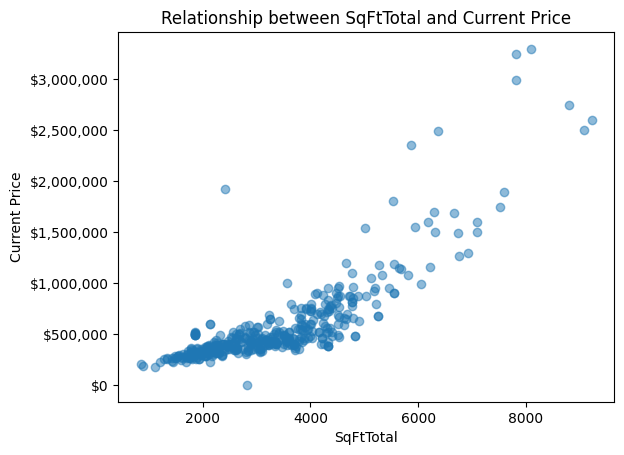

In [75]:

plt.scatter(no_sold_houses['SqFtTotal'], no_sold_houses['CurrentPrice'], alpha=0.5)
plt.xlabel('SqFtTotal')
plt.ylabel('Current Price')
plt.title('Relationship between SqFtTotal and Current Price')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

In [88]:
# We see that the average price of the SQFT in an unsold house is 13% higher
# than the average price of a SQFT in a sold house

print(f"Ratio Current Price by SQFT in Sold Houses: ${round(sold_houses['RATIO_CurrentPrice_By_SQFT'].mean(),2)} VS "
      f"Ratio Current Price by SQFT in No Sold Houses: ${round(no_sold_houses['RATIO_CurrentPrice_By_SQFT'].mean(),2)}")

Ratio Current Price by SQFT in Sold Houses: $146.26 VS Ratio Current Price by SQFT in No Sold Houses: $165.9
